In [6]:
df = read.csv('C:/Users/MANI/Documents/R sem 2/decision tree/cancerdata.csv')

In [7]:
head(df)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


# problem statement: to classify the data that is benign or malignant.

In [163]:
str(df)

'data.frame':	569 obs. of  32 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se            

In [164]:
summary(df)

       id            diagnosis  radius_mean      texture_mean  
 Min.   :     8670   B:357     Min.   : 6.981   Min.   : 9.71  
 1st Qu.:   869218   M:212     1st Qu.:11.700   1st Qu.:16.17  
 Median :   906024             Median :13.370   Median :18.84  
 Mean   : 30371831             Mean   :14.127   Mean   :19.29  
 3rd Qu.:  8813129             3rd Qu.:15.780   3rd Qu.:21.80  
 Max.   :911320502             Max.   :28.110   Max.   :39.28  
 perimeter_mean     area_mean      smoothness_mean   compactness_mean 
 Min.   : 43.79   Min.   : 143.5   Min.   :0.05263   Min.   :0.01938  
 1st Qu.: 75.17   1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492  
 Median : 86.24   Median : 551.1   Median :0.09587   Median :0.09263  
 Mean   : 91.97   Mean   : 654.9   Mean   :0.09636   Mean   :0.10434  
 3rd Qu.:104.10   3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040  
 Max.   :188.50   Max.   :2501.0   Max.   :0.16340   Max.   :0.34540  
 concavity_mean    concave.points_mean symmetry_mean   

In [165]:
any(is.na(df))

[1] FALSE

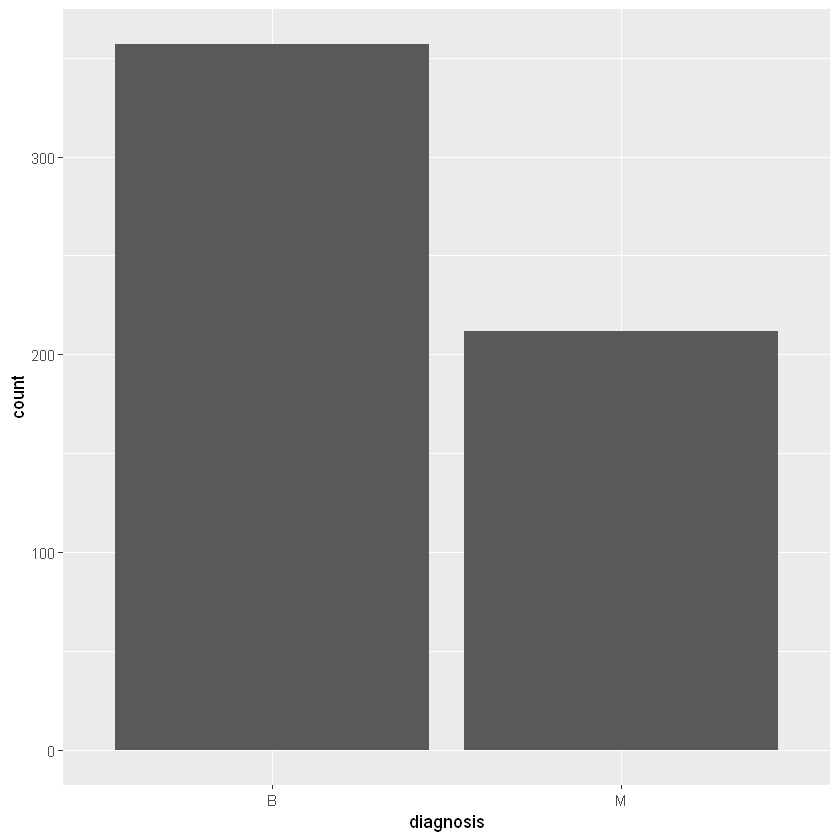

In [166]:
library(ggplot2)
ggplot(df,aes(diagnosis)) + geom_bar() 

# There are more Benign cases in the graph than malignant cases in the data.

In [256]:
num.cols = sapply(df,is.numeric)

filtering numeric columns for correlation

In [255]:
cor.data = cor(df[,num.cols])
cor.data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000000,0.323781891,0.997855281,0.987357170,0.17058119,0.50612358,0.67676355,0.82252852,0.14774124,-0.3116308263,...,0.96953897,0.297007644,0.965136514,0.94108246,0.11961614,0.41346282,0.52691146,0.7442142,0.16395333,0.007065886
texture_mean,0.323781891,1.000000000,0.329533059,0.321085696,-0.02338852,0.23670222,0.30241783,0.29346405,0.07140098,-0.0764371834,...,0.35257295,0.912044589,0.358039575,0.34354595,0.07750336,0.27782959,0.30102522,0.2953158,0.10500791,0.119205351
perimeter_mean,0.997855281,0.329533059,1.000000000,0.986506804,0.20727816,0.55693621,0.71613565,0.85097704,0.18302721,-0.2614769081,...,0.96947636,0.303038372,0.970386887,0.94154981,0.15054940,0.45577423,0.56387926,0.7712408,0.18911504,0.051018530
area_mean,0.987357170,0.321085696,0.986506804,1.000000000,0.17702838,0.49850168,0.68598283,0.82326887,0.15129308,-0.2831098117,...,0.96274609,0.287488627,0.959119574,0.95921333,0.12352294,0.39041031,0.51260592,0.7220166,0.14356991,0.003737597
smoothness_mean,0.170581187,-0.023388516,0.207278164,0.177028377,1.00000000,0.65912322,0.52198377,0.55369517,0.55777479,0.5847920019,...,0.21312014,0.036071799,0.238852626,0.20671836,0.80532420,0.47246844,0.43492571,0.5030534,0.39430948,0.499316369
compactness_mean,0.506123578,0.236702222,0.556936211,0.498501682,0.65912322,1.00000000,0.88312067,0.83113504,0.60264105,0.5653686634,...,0.53531540,0.248132833,0.590210428,0.50960381,0.56554117,0.86580904,0.81627525,0.8155732,0.51022343,0.687382323
concavity_mean,0.676763550,0.302417828,0.716135650,0.685982829,0.52198377,0.88312067,1.00000000,0.92139103,0.50066662,0.3367833594,...,0.68823641,0.299878889,0.729564917,0.67598723,0.44882204,0.75496802,0.88410264,0.8613230,0.40946413,0.514929891
concave.points_mean,0.822528522,0.293464051,0.850977041,0.823268869,0.55369517,0.83113504,0.92139103,1.00000000,0.46249739,0.1669173832,...,0.83031763,0.292751713,0.855923128,0.80962962,0.45275305,0.66745368,0.75239950,0.9101553,0.37574415,0.368661134
symmetry_mean,0.147741242,0.071400980,0.183027212,0.151293079,0.55777479,0.60264105,0.50066662,0.46249739,1.00000000,0.4799213301,...,0.18572775,0.090650688,0.219168559,0.17719338,0.42667503,0.47320001,0.43372101,0.4302966,0.69982580,0.438413498
fractal_dimension_mean,-0.311630826,-0.076437183,-0.261476908,-0.283109812,0.58479200,0.56536866,0.33678336,0.16691738,0.47992133,1.0000000000,...,-0.25369149,-0.051269202,-0.205151211,-0.23185445,0.50494208,0.45879816,0.34623388,0.1753254,0.33401868,0.767296779


checking for the correlation of variables

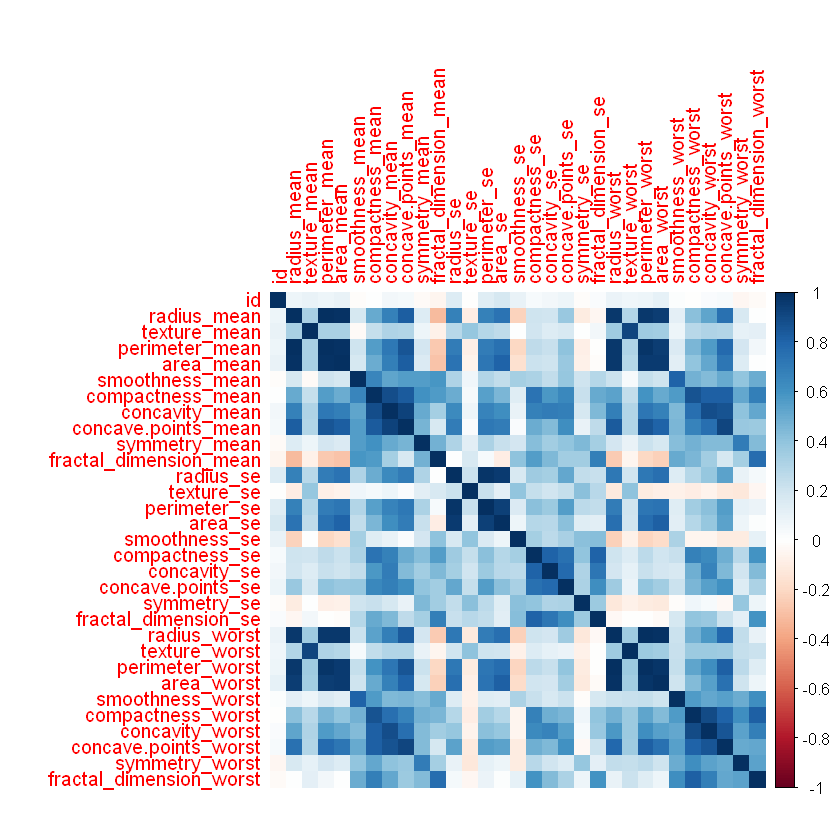

In [169]:
library(corrplot)
corrplot(cor.data,method='color')

# In the corrplot concave.points mean , perimeter mean and texture worst are correlated. so the tree took it for the classification.

In [170]:
library(rpart)
df = select(df, c(-id))

# Dropping the ID column

In [193]:
library(caTools)

set.seed(101) 

sample = sample.split(df$diagnosis, SplitRatio = .70)
train = subset(df, sample == TRUE)
test = subset(df, sample == FALSE)

# splitting the data into train and test data using sample.split function.

In [265]:
tree <- rpart(diagnosis ~ .,method='class',data = train)

# Using target variable diagnosis training the model using rpart function and we are doing classification so we are using method class and data is training data.

In [266]:
tree.preds <- predict(tree,test)

# Predicting the values using test data

In [267]:
head(tree.preds)

,B,M
11,0.0530303,0.94696970
14,0.9788136,0.02118644
17,0.0530303,0.94696970
25,0.0530303,0.94696970
28,0.0530303,0.94696970
29,0.0530303,0.94696970


In [268]:
tree.preds <- as.data.frame(tree.preds)
joiner <- function(x){
    if (x>0.5){
        return('M')
    }else{
        return('B')
    }
}

# created a function joiner giving a threshold value of 0.5 to classify benign and malignant cases in the predicted data.

In [269]:
tree.preds$diagnosis <- sapply(tree.preds$M,joiner)

In [271]:
head(tree.preds)

,B,M,diagnosis
11,0.0530303,0.94696970,M
14,0.9788136,0.02118644,B
17,0.0530303,0.94696970,M
25,0.0530303,0.94696970,M
28,0.0530303,0.94696970,M
29,0.0530303,0.94696970,M


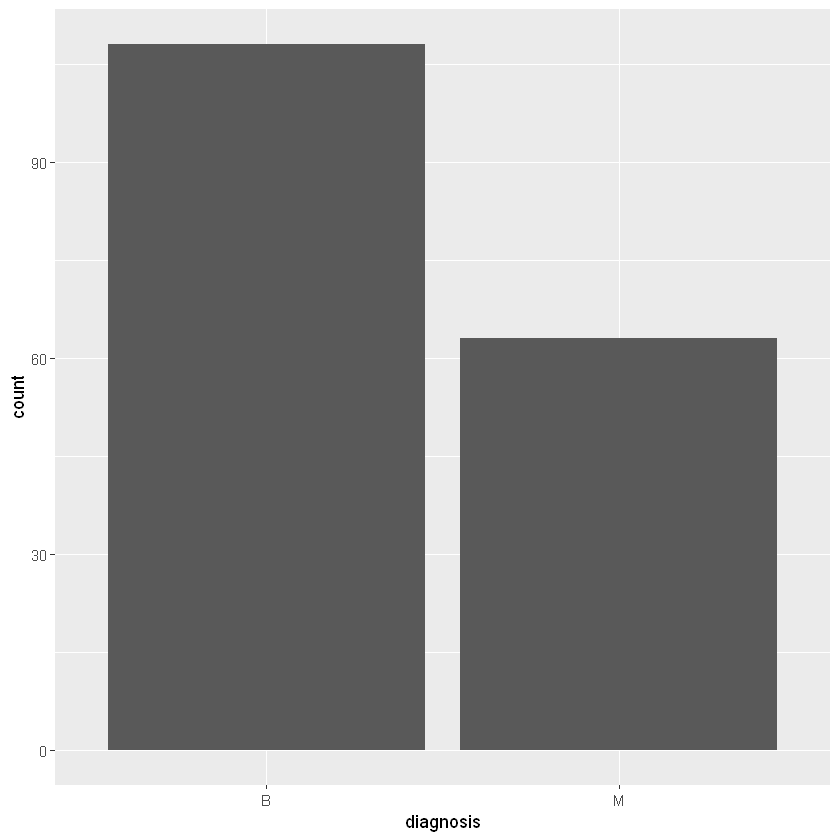

In [272]:
ggplot(tree.preds,aes(diagnosis)) + geom_bar()

# Plotting the graph for predicted values as there are more benign cases in the predicted data also

In [273]:
tree.preds$diagnosis = factor(tree.preds$diagnosis)

In [274]:
table(tree.preds$diagnosis,test$diagnosis)

   
      B   M
  B 102   6
  M   5  58

58 patients has actual cancer and model truly predicted cancer.
102 patients doesnt actually have cancer and model truly predicted doesnot actually have cancer.
6 actually doesnt have cancer but model wrongly predicted they had cancer.
5 patients actually have cancer and but model predicted they doesnt have cancer.

In [275]:
TP = 58
TN = 102
FP = 6
FN = 5

In [276]:
accuracy = (TP + TN) / (TP+TN+FN+FP)
accuracy
            

[1] 0.9356725

# So the model accuracy got  93% so it can corectly classify the data between malignant and benign.

In [277]:
error.rate = (FP+FN) / (TP+TN+FN+FP)
error.rate

[1] 0.06432749

# 6% is the error rate of wrongly predicted values in the model that is false positive and false negative.

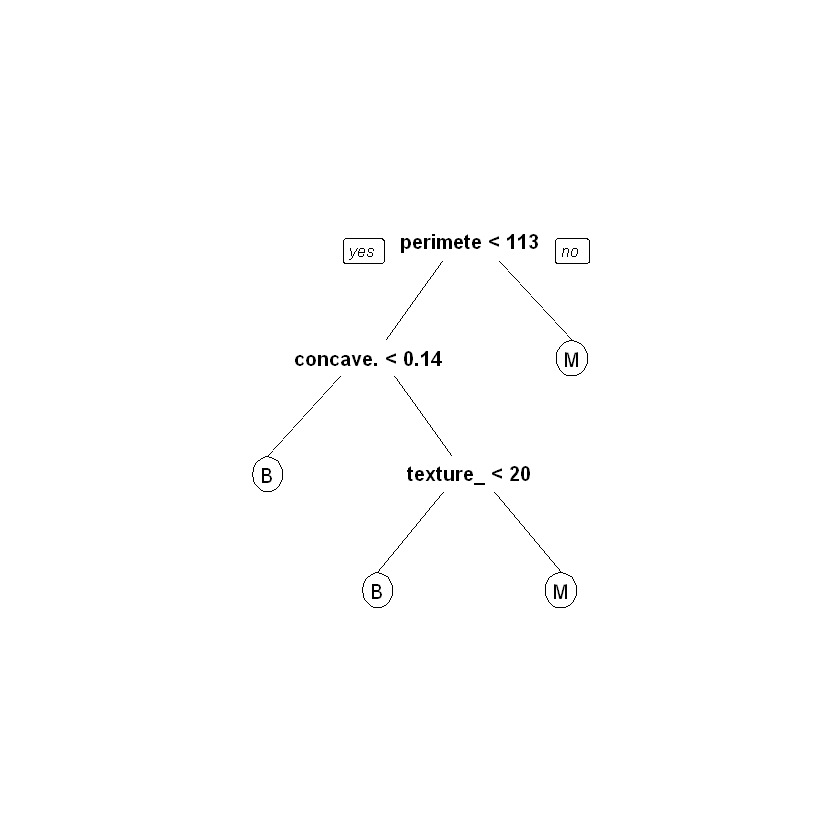

In [278]:
library(rpart.plot)
prp(tree)

If perimeter mean < 113 and concave.points mean < 0.14 then it is benign.

If perimeter mean > 113 then it is malignant.

If perimeter mean < 113 and concave.points mean > 0.14 and texture_worst > 20 then it is malignant.


If perimeter mean < 113 and concave.points mean > 0.14 and texture_worst < 20 then it is malignant.


In [279]:
library(pROC)

In [280]:
change = function(x){
    if(x == 'M')
        return(1)
    else
        return(0)
}

In [281]:
test_prob = sapply(tree.preds$diagnosis,change)

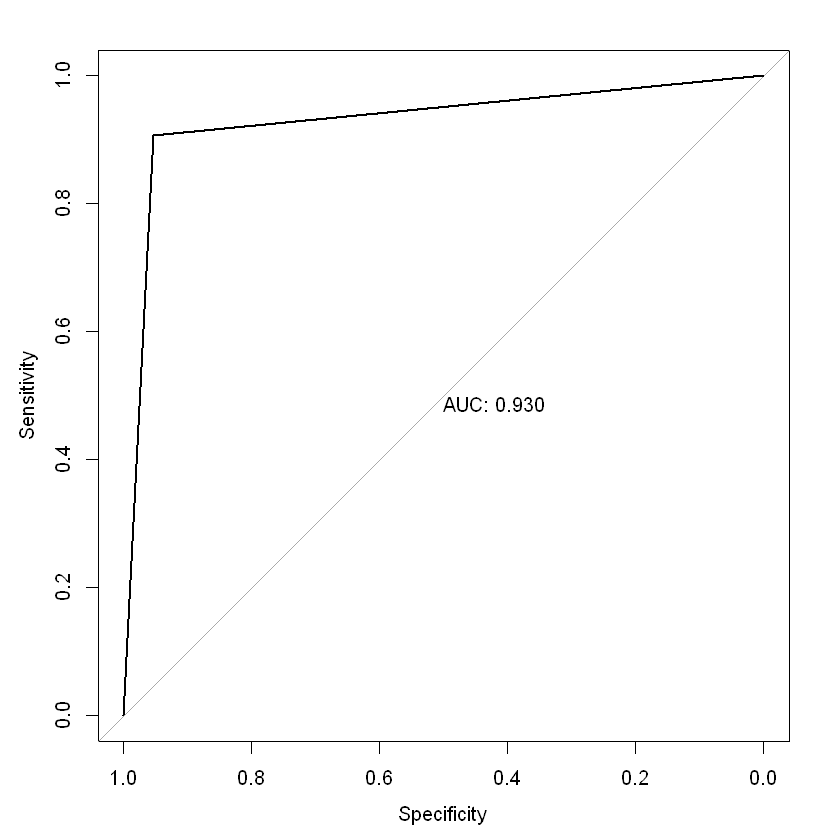

In [283]:
test_roc=roc(test$diagnosis ~ test_prob,plot =TRUE,print.auc=TRUE)

# Area Under Curve got 93.0% in the model.So the score is 0.93. The perfect classifier is 1.So the model can classify 0.93 better between negative class (0) and positive class (1)

# Random Forest

In [206]:
library(randomForest)

# Training the model

In [284]:
rf.model <- randomForest(diagnosis ~ ., data = train,importance = TRUE)

Training the model using randomforest function target variable is diagnosis and the data is train and we are saving the model in the rf.model.

In [285]:
p <- predict(rf.model,test)

Predicting the model using predict function

In [286]:
table(p,test$diagnosis)

   
p     B   M
  B 105   4
  M   2  60

60 patients has actual cancer and model truly predicted cancer.
105 patients doesnt actually have cancer and model truly predicted doesnot actually have cancer.
4 actually doesnt have cancer but model wrongly predicted they had cancer.
2 patients actually have cancer and but model predicted they doesnt have cancer.

In [288]:
TP = 60
TN = 105
FN = 2
FP = 4

In [289]:
accuracy = (TP + TN) / (TP+TN+FN+FP)
accuracy

[1] 0.9649123

# So the model accuracy got 96% so it can corectly classify the data between malignant and benign.

In [290]:
error.rate = (FP+FN) / (TP+TN+FN+FP)
error.rate

[1] 0.03508772

# 6% is the error rate of wrongly predicted values in the model that is false positive and false negative.

In [291]:
library(pROC)

In [292]:
test_prob = predict(rf.model,newdata = test, type ="response")

In [293]:
change = function(x){
    if(x == 'M')
        return(1)
    else
        return(0)
}

In [294]:
test_prob = sapply(test_prob,change)

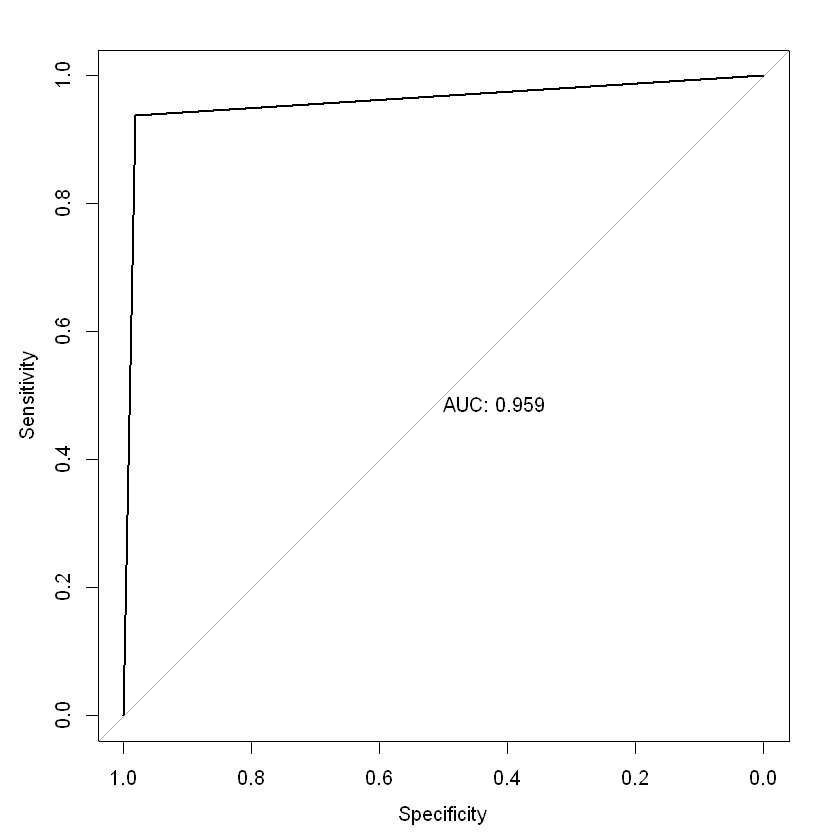

In [295]:
test_roc=roc(test$diagnosis ~ test_prob,plot =TRUE,print.auc=TRUE)

# Area Under Curve got 95.9% in the model.So the score is 0.96. The perfect classifier is 1.So the model can classify 0.96 better between negative class (0) and positive class (1)